<a href="https://colab.research.google.com/github/iAryan99/Speech-Signal-Processing-for-ML/blob/main/Extracting_MFCCs_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading an audio file
!wget -O audio_file https://www.signalogic.com/melp/EngSamples/Orig/female.wav

--2022-03-30 12:21:43--  https://www.signalogic.com/melp/EngSamples/Orig/female.wav
Resolving www.signalogic.com (www.signalogic.com)... 209.150.126.178
Connecting to www.signalogic.com (www.signalogic.com)|209.150.126.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 786740 (768K) [audio/x-wav]
Saving to: ‘audio_file’

audio_file          100%[===================>] 768.30K  --.-KB/s    in 0.03s   

2022-03-30 12:21:43 (29.8 MB/s) - ‘audio_file’ saved [786740/786740]



In [5]:
#Checking the audio file
audio_file = '/content/audio_file'
ipd.Audio(audio_file)

In [6]:
#Loading audio files with Librosa
signal, sr = librosa.load(audio_file)

In [7]:
signal.shape
#The o/p shows the amount of samples in the audio waveform

(1084166,)

In [8]:
#Extracting MFCCs
mfcc = librosa.feature.mfcc(signal, n_mfcc = 13, sr=sr)
mfcc.shape
#13 rows, as specified in the i/p as n_mfcc
#2118 columns, in other words 2118 different frames or discrete time forms

(13, 2118)

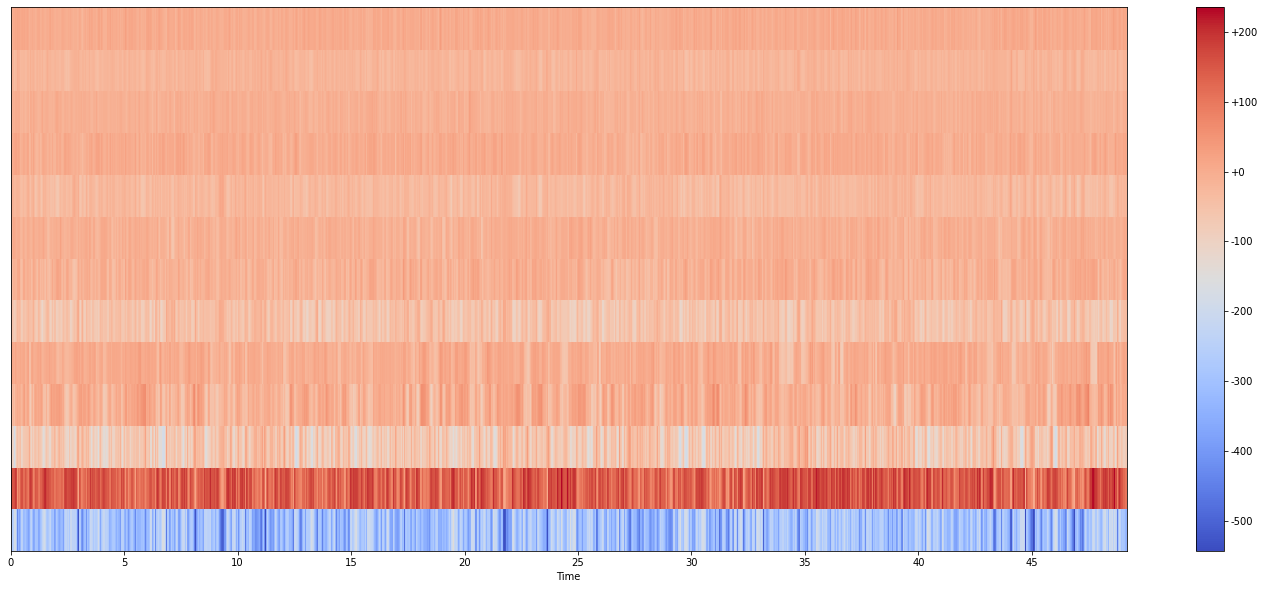

In [10]:
#Visualizing MFCCs
plt.figure(figsize = (25, 10))
librosa.display.specshow(mfcc, 
                         x_axis = "time", 
                         sr = sr)
plt.colorbar(format = "%+2.f")
plt.show()

In [17]:
#Calculating 1st & 2nd derivates of MFCCs
delta1_mfcc = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

In [18]:
delta1_mfcc.shape
#This is same as mfcc.shape

(13, 2118)

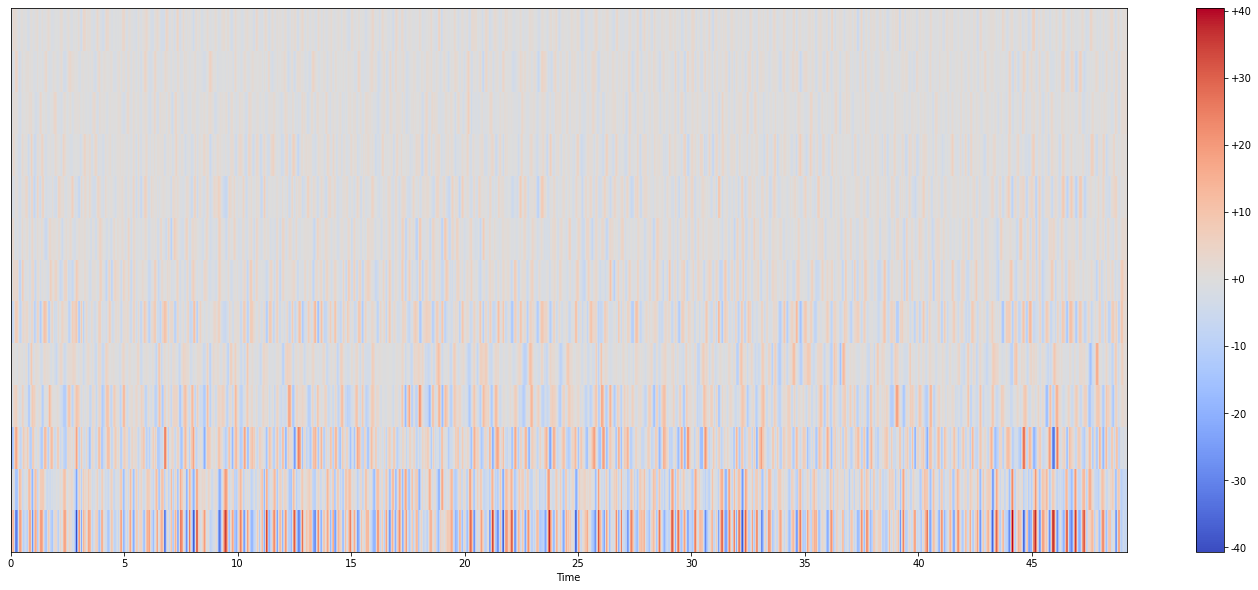

In [19]:
plt.figure(figsize = (25, 10))
librosa.display.specshow(delta1_mfcc, 
                         x_axis = "time", 
                         sr = sr)
plt.colorbar(format = "%+2.f")
plt.show()

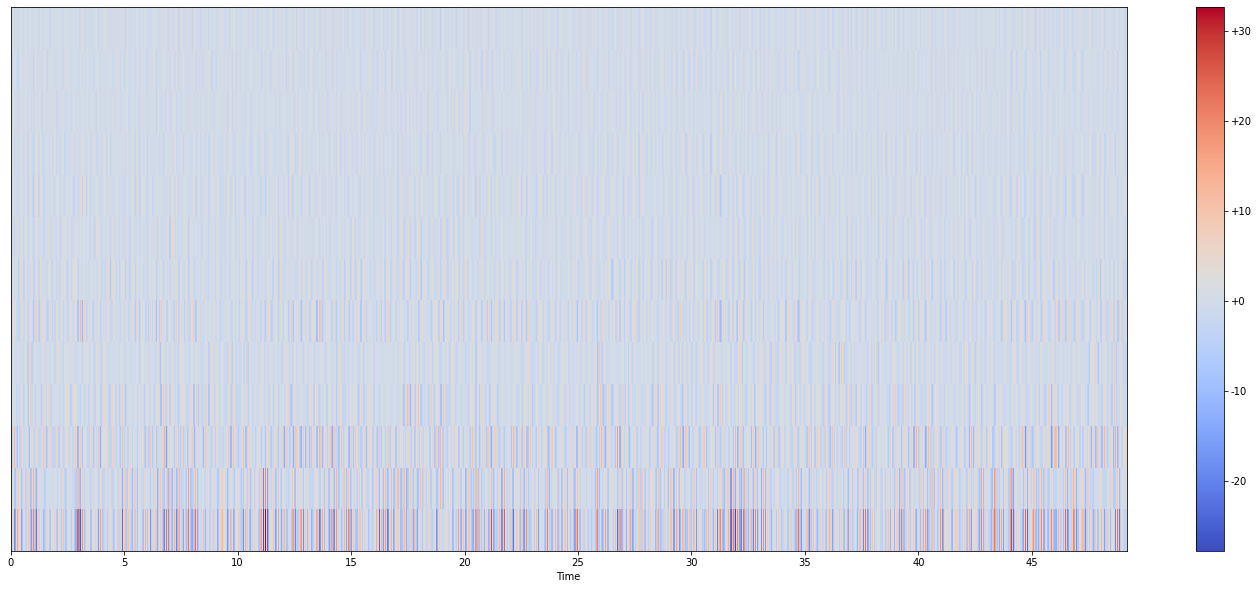

In [20]:
plt.figure(figsize = (25, 10))
librosa.display.specshow(delta2_mfcc, 
                         x_axis = "time", 
                         sr = sr)
plt.colorbar(format = "%+2.f")
plt.show()

In [21]:
comprehensive_mfcc = np.concatenate((mfcc, delta1_mfcc, delta2_mfcc))

In [23]:
comprehensive_mfcc.shape
#39 rows due to the concatenation of 13 indexes for each of the 3 arrays

(39, 2118)